# General

## Encoding

### ASCII

In [1]:
print(''.join(chr(char) for char in [99, 114, 121, 112, 116, 111, 123, 65, 83, 67, 73, 73, 95, 112, 114, 49, 110, 116, 52, 98, 108, 51, 125]))

crypto{ASCII_pr1nt4bl3}


### Hex

In [2]:
print(bytes.fromhex("63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d").decode('utf-8'))

crypto{You_will_be_working_with_hex_strings_a_lot}


### Base64

In [3]:
import base64
print(base64.b64encode(bytes.fromhex("72bca9b68fc16ac7beeb8f849dca1d8a783e8acf9679bf9269f7bf")).decode('utf-8'))

crypto/Base+64+Encoding+is+Web+Safe/


### Bytes and Big Integers

In [4]:
from Crypto.Util.number import long_to_bytes
print(long_to_bytes(int("11515195063862318899931685488813747395775516287289682636499965282714637259206269")).decode('utf-8'))

crypto{3nc0d1n6_4ll_7h3_w4y_d0wn}


### Encoding Challenge

In [5]:
from pwn import *
import json
import base64
import codecs
from Crypto.Util.number import long_to_bytes

context.log_level = 'error'

def json_recv(r):
    return json.loads(r.recvline().decode())

def json_send(r, hsh):
    r.sendline(json.dumps(hsh).encode())

def decode_data(data_type, encoded_data):
    if data_type == "base64":
        return base64.b64decode(encoded_data).decode('utf-8')
    elif data_type == "hex":
        return bytes.fromhex(encoded_data).decode('utf-8')
    elif data_type == "rot13":
        return codecs.decode(encoded_data, 'rot_13')
    elif data_type == "bigint":
        return long_to_bytes(int(encoded_data, 16)).decode('utf-8')
    elif data_type == "utf-8":
        return ''.join(chr(num) for num in encoded_data)
    return "Unsupported encoding"

def main():
    r = remote('socket.cryptohack.org', 13377)
    try:
        while True:
            received = json_recv(r)
            if 'type' in received:
                data_type = received["type"]
                encoded_data = received["encoded"]
                decoded_value = decode_data(data_type, encoded_data)
                print(f"{data_type} {encoded_data} -> {decoded_value}")
                json_send(r, {"decoded": decoded_value})
            else:
                print(f"Final Response: {received}")
                break
    finally:
        r.close()

if __name__ == "__main__":
    main()

base64 bWluZF90ZWFfc3BvbnNvcg== -> mind_tea_sponsor
rot13 cu_yrba_urnevat -> ph_leon_hearing
utf-8 [115, 111, 117, 108, 95, 100, 105, 102, 102, 101, 114, 101, 110, 99, 101, 115, 95, 112, 97, 121, 109, 101, 110, 116] -> soul_differences_payment
hex 737065636966795f6e705f77656c64696e67 -> specify_np_welding
hex 706f70756c6174696f6e735f7769746e6573735f706c616e6574 -> populations_witness_planet
utf-8 [97, 115, 115, 97, 117, 108, 116, 95, 112, 97, 114, 101, 110, 116, 97, 108, 95, 99, 104, 117, 114, 99, 104, 101, 115] -> assault_parental_churches
base64 cmVmZXJyYWxfZGVzZXJ2ZV9hdWN0aW9ucw== -> referral_deserve_auctions
base64 cHJvYmVfaW5pdGlhdGl2ZXNfcG9seXBob25pYw== -> probe_initiatives_polyphonic
bigint 0x666f7263655f736574746c655f61647269616e -> force_settle_adrian
base64 amVzc2ljYV9jcmFwc19sb3Vpc2lhbmE= -> jessica_craps_louisiana
rot13 fbyhgvba_cbfgf_cnentencuf -> solution_posts_paragraphs
bigint 0x726f627573745f61637469766174696f6e5f7570636f6d696e67 -> robust_activation_upcoming
base64 YX

## XOR

### XOR Starter

In [6]:
print(f"crypto{{{''.join(chr(ord(char) ^ 13) for char in "label")}}}")

crypto{aloha}


### XOR Properties

In [7]:
from binascii import unhexlify

KEY1 = unhexlify('a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313')
KEY1_XOR_KEY2 = unhexlify('37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e')
KEY2_XOR_KEY3 = unhexlify('c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1')
FLAG_XOR_KEYS = unhexlify('04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf')

KEY2 = bytes(a ^ b for a, b in zip(KEY1, KEY1_XOR_KEY2))
KEY3 = bytes(a ^ b for a, b in zip(KEY2, KEY2_XOR_KEY3))
FLAG = bytes(f ^ k1 ^ k2 ^ k3 for f, k1, k2, k3 in zip(FLAG_XOR_KEYS, KEY1, KEY2, KEY3))

print(FLAG.decode())

crypto{x0r_i5_ass0c1at1v3}


### Favourite byte

In [8]:
from binascii import unhexlify

hex_data = '73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d'
data = unhexlify(hex_data)

def xor_with_key(data, key):
    return bytes(b ^ key for b in data)

for key in range(256):
    decrypted = xor_with_key(data, key)
    try:
        decrypted_text = decrypted.decode('utf-8')
        if decrypted_text.startswith('crypto{'):
            print(f'{decrypted_text} Key {key}')
    except UnicodeDecodeError:
        continue

crypto{0x10_15_my_f4v0ur173_by7e} Key 16


### You either know, XOR you don't

In [9]:
encrypted_hex = "0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104"
ciphertext = bytes.fromhex(encrypted_hex)
known_plain = b'crypto{'

potential_key = bytes(c1 ^ c2 for c1, c2 in zip(ciphertext[:7], known_plain))
print(f"Found key start: {potential_key}")
key = b'myXORkey'
print(f"Using key: {key}")
decrypted = bytes(c1 ^ c2 for c1, c2 in zip(ciphertext, key * (len(ciphertext) // len(key) + 1)))
print(decrypted.decode())

Found key start: b'myXORke'
Using key: b'myXORkey'
crypto{1f_y0u_Kn0w_En0uGH_y0u_Kn0w_1t_4ll}


### Lemur XOR

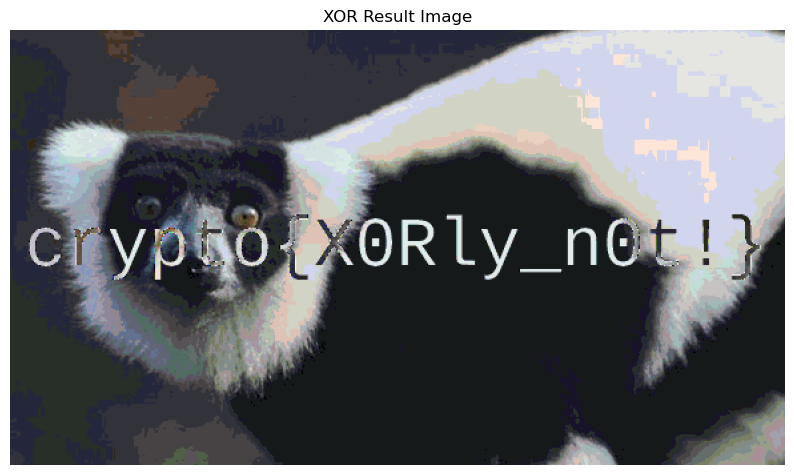

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

lemur_path = './lemur.png'
flag_path = './flag.png'
lemur_img = Image.open(lemur_path)
flag_img = Image.open(flag_path)

if lemur_img.size != flag_img.size:
    raise ValueError("Images must be of the same dimensions for XOR operation.")

lemur_array = np.array(lemur_img)
flag_array = np.array(flag_img)
xor_result = np.bitwise_xor(lemur_array, flag_array)
xor_image = Image.fromarray(xor_result)

plt.figure(figsize=(10, 10))
plt.imshow(xor_image)
plt.axis('off')
plt.title('XOR Result Image')
plt.show()


## Mathematics

### Greatest Common Divisor

In [11]:
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

result = gcd(66528, 52920)
result

1512

### Extended GCD

In [12]:
def extended_gcd(a, b):
    if b == 0:
        return a, 1, 0
    gcd, u1, v1 = extended_gcd(b, a % b)
    u = v1
    v = u1 - (a // b) * v1
    return gcd, u, v

p = 26513
q = 32321

gcd, u, v = extended_gcd(p, q)
u, v, gcd
v

-8404

### Modular Arithmetic 1

In [13]:
x = 11 % 6
y = 8146798528947 % 17
x, y, min(x, y)
y

4

### Modular Arithmetic 2

In [14]:
p = 65537
base = 273246787654
result = pow(base, 65536, p)
result

1

### Modular Inverting

In [15]:
g = 3
p = 13
d = pow(g, p - 2, p)
d

9

## Data Formats

### Privacy-Enhanced Mail?

In [16]:
from Crypto.PublicKey import RSA

pem_file_path = './privacy_enhanced_mail.pem'
with open(pem_file_path, 'r') as pem_file:
    pem_data = pem_file.read()
rsa_key = RSA.import_key(pem_data)
private_key_d = rsa_key.d
private_key_d

15682700288056331364787171045819973654991149949197959929860861228180021707316851924456205543665565810892674190059831330231436970914474774562714945620519144389785158908994181951348846017432506464163564960993784254153395406799101314760033445065193429592512349952020982932218524462341002102063435489318813316464511621736943938440710470694912336237680219746204595128959161800595216366237538296447335375818871952520026993102148328897083547184286493241191505953601668858941129790966909236941127851370202421135897091086763569884760099112291072056970636380417349019579768748054760104838790424708988260443926906673795975104689

### CERTainly not

In [17]:
from cryptography.hazmat.primitives import serialization
from cryptography.x509 import load_der_x509_certificate

der_file_path = "2048b-rsa-example-cert.der"
with open(der_file_path, "rb") as der_file:
    der_data = der_file.read()
cert = load_der_x509_certificate(der_data)
public_key = cert.public_key()
if hasattr(public_key, 'public_numbers'):
    modulus = public_key.public_numbers().n
modulus

22825373692019530804306212864609512775374171823993708516509897631547513634635856375624003737068034549047677999310941837454378829351398302382629658264078775456838626207507725494030600516872852306191255492926495965536379271875310457319107936020730050476235278671528265817571433919561175665096171189758406136453987966255236963782666066962654678464950075923060327358691356632908606498231755963567382339010985222623205586923466405809217426670333410014429905146941652293366212903733630083016398810887356019977409467374742266276267137547021576874204809506045914964491063393800499167416471949021995447722415959979785959569497

### SSH Keys

In [18]:
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives.serialization import load_ssh_public_key

ssh_pub_key_path = "bruce_rsa.pub"
with open(ssh_pub_key_path, "rb") as key_file:
    ssh_pub_key_data = key_file.read()
public_key = load_ssh_public_key(ssh_pub_key_data)
if isinstance(public_key, rsa.RSAPublicKey):
    modulus = public_key.public_numbers().n
modulus

3931406272922523448436194599820093016241472658151801552845094518579507815990600459669259603645261532927611152984942840889898756532060894857045175300145765800633499005451738872081381267004069865557395638550041114206143085403607234109293286336393552756893984605214352988705258638979454736514997314223669075900783806715398880310695945945147755132919037973889075191785977797861557228678159538882153544717797100401096435062359474129755625453831882490603560134477043235433202708948615234536984715872113343812760102812323180391544496030163653046931414723851374554873036582282389904838597668286543337426581680817796038711228401443244655162199302352017964997866677317161014083116730535875521286631858102768961098851209400973899393964931605067856005410998631842673030901078008408649613538143799959803685041566964514489809211962984534322348394428010908984318940411698961150731204316670646676976361958828528229837610795843145048243492909

### Transparency


1. Visit the [Certificate Transparency Log Viewer](https://crt.sh/?q=cryptohack.org).
2. Locate the relevant subdomain:
   - **`thetransparencyflagishere.cryptohack.org`**
3. Go to this subdomain in your browser:
   - [https://thetransparencyflagishere.cryptohack.org](https://thetransparencyflagishere.cryptohack.org).